In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, ccf
import numpy as np
import plotly.express as px
from datetime import datetime
import geopandas as gpd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
from utils import *

Power Outage Dataset: EAGLE_I

 Load the power outage for 2023, eaglei_outages_2023.csv as a pandas dataframe. It contains information on the total number of customers out of power for every 15 minutes that starts at run_start_time, for a given county in a given state. Note that not all time periods for all counties are available in the dataset. 

In [4]:
# Load the dataset
df_power = pd.read_csv('./data/eaglei_data/eaglei_outages_2023.csv')
df_power

,fips_code,county,state,customers_out,run_start_time
0,1003,Baldwin,Alabama,1,2023-01-01 00:00:00
1,1011,Bullock,Alabama,9,2023-01-01 00:00:00
2,1015,Calhoun,Alabama,4,2023-01-01 00:00:00
3,1021,Chilton,Alabama,4,2023-01-01 00:00:00
4,1029,Cleburne,Alabama,142,2023-01-01 00:00:00
...,...,...,...,...,...
26101046,55095,Polk,Wisconsin,0,2023-12-31 23:45:00
26101047,55105,Rock,Wisconsin,1,2023-12-31 23:45:00
26101048,55109,St. Croix,Wisconsin,0,2023-12-31 23:45:00
26101049,55129,Washburn,Wisconsin,0,2023-12-31 23:45:00


In [11]:
df_power['state_code'], uniques = pd.factorize(df_power['state'])



In [ ]:
import plotly.io as pio
pio.renderers.default = 'vscode'

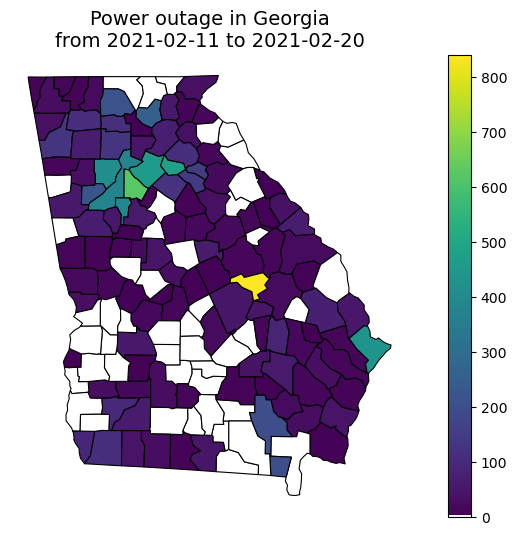

In [33]:
start_time = '2021-02-11 00:00:00'
end_time='2021-02-20 00:00:00'
plot_outages_on_map_state(start_time,
                          end_time,
                          state='Georgia')

In [20]:
plot_outages_on_map_us(start_time = '2023-01-01 00:00:00',
                       end_time='2023-02-28 00:00:00')

Storm Events dataset: NOAA

Storm event dataset from the National Oceanic and Atmospheric Administration (NOAA), including storm event details for the U.S. from 2014 to 2024, with one .csv file for each year. For convenience, and combined these 11 file into a single StormEvents_2014_2024.csv file.

In [21]:
df_events = pd.read_csv("./data/NOAA_StormEvents/StormEvents_2014_2024.csv")
df_events

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201402,18,1000,201402,18,2000,83473,503953,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing south of Long Island a...,Eight to twelve inches of snow fell across eas...,CSV
1,201403,30,831,201403,30,931,83971,507163,MASSACHUSETTS,25,...,1.0,WNW,CHELMSFORD CENTER,42.5861,-71.3472,42.5867,-71.3469,A stacked low pressure system passed south and...,Boston Road was closed near Brian Road due to ...,CSV
2,201404,27,2306,201404,27,2306,83517,506236,MISSOURI,29,...,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system and a dry line produce...,NaN,CSV
3,201404,27,2303,201404,27,2303,83517,506237,MISSOURI,29,...,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system and a dry line produce...,Several power poles snapped and trees blown down.,CSV
4,201402,15,1300,201402,15,2100,83132,501499,WASHINGTON,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front produced strong winds for ...,Two stations measured strong wind gusts in the...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691429,202405,26,1148,202405,26,1148,192532,1188957,KENTUCKY,21,...,1.0,E,EAST NEEDMORE,37.6500,-84.7200,37.6500,-84.7200,A strong storm system moved across the Ohio an...,A trained spotter estimated 60 mph wind gusts ...,CSV
691430,202405,22,1809,202405,22,1809,192530,1188234,INDIANA,18,...,2.0,ESE,SCOTTSBURG,38.6713,-85.7364,38.6713,-85.7364,A cold front moved into the Ohio Valley during...,A tree was down at Lovers Lane and Prewitt Lane.,CSV
691431,202405,22,1757,202405,22,1757,192530,1188232,INDIANA,18,...,2.0,NE,CANNELTON,37.9478,-86.7247,37.9478,-86.7247,A cold front moved into the Ohio Valley during...,A tree was reported down over Chestnut Grove R...,CSV
691432,202406,23,1745,202406,23,1750,191388,1192879,NEW HAMPSHIRE,33,...,1.0,NE,GREENLAND,43.0400,-70.8400,43.0400,-70.8400,A supercell thunderstorm developed across sout...,A supercell thunderstorm dropped hail the size...,CSV


In [23]:
df_events.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [27]:
df_events[['BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']]

,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing south of Long Island a...,Eight to twelve inches of snow fell across eas...,CSV
1,1.0,WNW,CHELMSFORD CENTER,1.0,WNW,CHELMSFORD CENTER,42.5861,-71.3472,42.5867,-71.3469,A stacked low pressure system passed south and...,Boston Road was closed near Brian Road due to ...,CSV
2,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system and a dry line produce...,NaN,CSV
3,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system and a dry line produce...,Several power poles snapped and trees blown down.,CSV
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front produced strong winds for ...,Two stations measured strong wind gusts in the...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691429,1.0,E,EAST NEEDMORE,1.0,E,EAST NEEDMORE,37.6500,-84.7200,37.6500,-84.7200,A strong storm system moved across the Ohio an...,A trained spotter estimated 60 mph wind gusts ...,CSV
691430,2.0,ESE,SCOTTSBURG,2.0,ESE,SCOTTSBURG,38.6713,-85.7364,38.6713,-85.7364,A cold front moved into the Ohio Valley during...,A tree was down at Lovers Lane and Prewitt Lane.,CSV
691431,2.0,NE,CANNELTON,2.0,NE,CANNELTON,37.9478,-86.7247,37.9478,-86.7247,A cold front moved into the Ohio Valley during...,A tree was reported down over Chestnut Grove R...,CSV
691432,1.0,NE,GREENLAND,1.0,NE,GREENLAND,43.0400,-70.8400,43.0400,-70.8400,A supercell thunderstorm developed across sout...,A supercell thunderstorm dropped hail the size...,CSV


Made a subset of the columns we think will be useful for our prediction model.

In [28]:
df_events_subset = df_events[['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'EVENT_TYPE', 'CZ_TIMEZONE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS','FLOOD_CAUSE', 
       'BEGIN_AZIMUTH', 'END_AZIMUTH', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']]

In [ ]:
print("Different storm event types in the US from 2014 to 2024:")
df_events_subset['EVENT_TYPE'].unique()

Different storm event types in the US from 2014 to 2024:


array(['Heavy Snow', 'Flood', 'Hail', 'Thunderstorm Wind', 'High Wind',
       'Winter Storm', 'Winter Weather', 'Drought', 'Ice Storm',
       'Tornado', 'Strong Wind', 'Flash Flood', 'Extreme Cold/Wind Chill',
       'Blizzard', 'Avalanche', 'Marine Thunderstorm Wind',
       'Cold/Wind Chill', 'Funnel Cloud', 'Heavy Rain', 'Frost/Freeze',
       'Wildfire', 'Sleet', 'Dust Storm', 'Freezing Fog', 'Waterspout',
       'Rip Current', 'Marine Hail', 'Lightning', 'Debris Flow',
       'Dense Fog', 'Astronomical Low Tide', 'High Surf', 'Coastal Flood',
       'Dust Devil', 'Hurricane (Typhoon)', 'Lake-Effect Snow',
       'Marine Strong Wind', 'Marine High Wind', 'Heat', 'Tropical Storm',
       'Lakeshore Flood', 'Seiche', 'Excessive Heat', 'Dense Smoke',
       'Marine Lightning', 'Marine Tropical Storm', 'Storm Surge/Tide',
       'Sneakerwave', 'Tsunami', 'Tropical Depression',
       'Marine Dense Fog', 'Hurricane', 'Marine Hurricane/Typhoon',
       'Marine Tropical Depression', 'Vo

One of the key features of storm events that impact power systems is the type of storm and the frequency with which it occurs within a county or state. 

The number of occurrences in a county/state in a short time period, can serve as an indicator of the event's severity and its extent. Below, we use the function barchart_events_by_state() to illustrate the distribution of event counts for three types of storms: winter storms, hurricanes, and excessive heat, specifically for the state of Texas.

In [ ]:
df_georgia=df_events_subset[df_events['STATE'] == 'GEORGIA']
df_georgia['EVENT_TYPE'].unique()

array(['Ice Storm', 'Hail', 'Strong Wind', 'Thunderstorm Wind',
       'Flash Flood', 'Wildfire', 'Tornado', 'Flood', 'Lightning',
       'Drought', 'Heavy Snow', 'Winter Storm', 'Heavy Rain',
       'Cold/Wind Chill', 'Winter Weather', 'Astronomical Low Tide',
       'Sleet', 'Funnel Cloud', 'Extreme Cold/Wind Chill',
       'Coastal Flood', 'Excessive Heat', 'Rip Current', 'Debris Flow',
       'High Wind', 'Tropical Storm', 'Hurricane', 'Storm Surge/Tide',
       'Heat', 'Tropical Depression', 'High Surf', 'Frost/Freeze',
       'Dense Fog'], dtype=object)

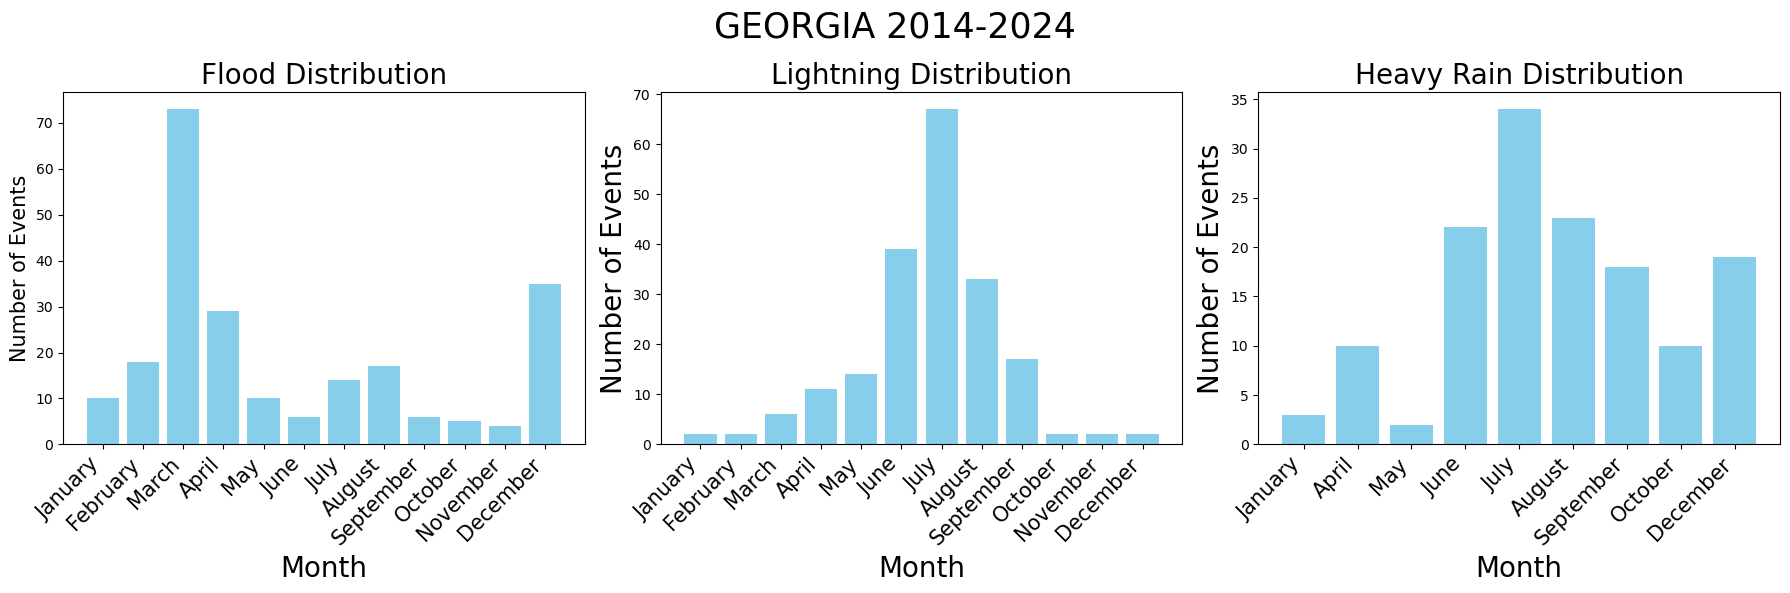

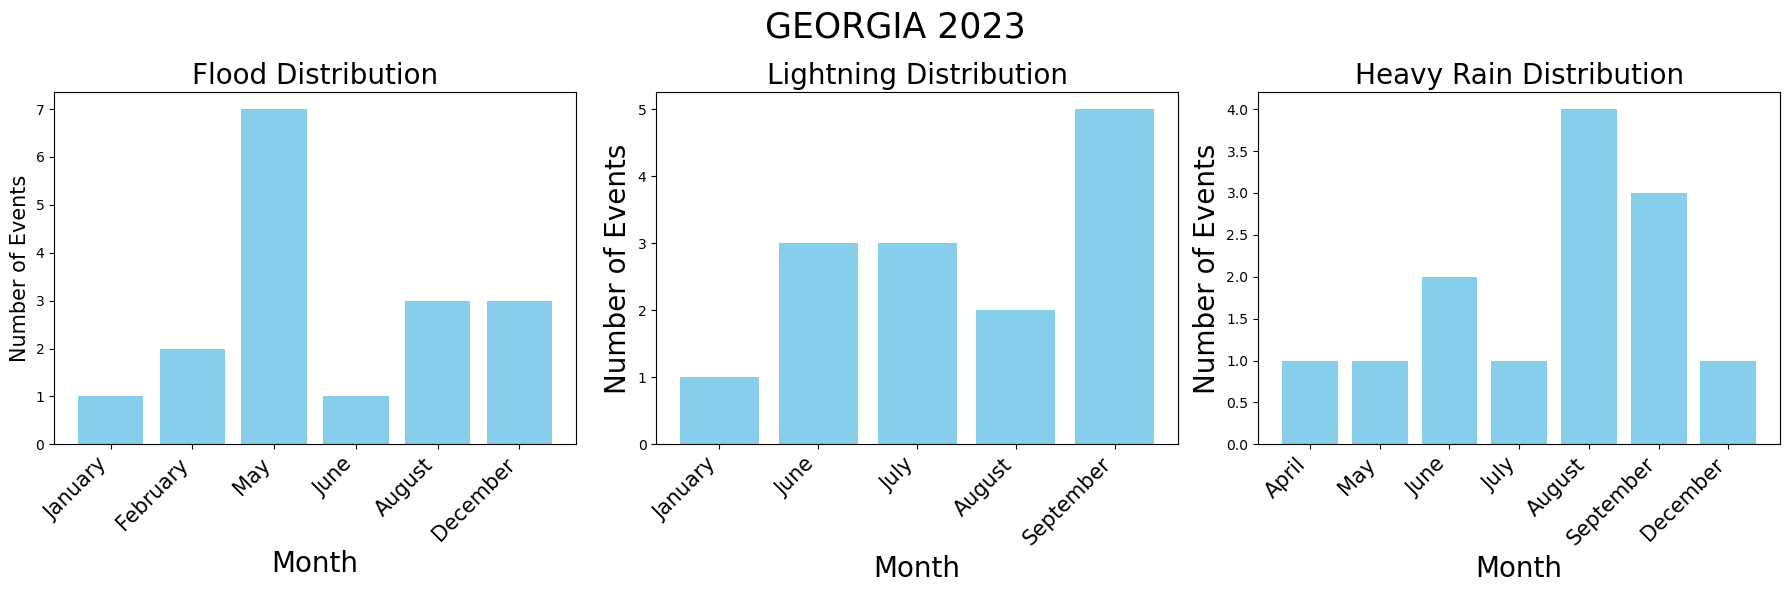

In [ ]:
GA_event_types = ['Flood', 'Lightning', 'Heavy Rain']

barchart_events_by_state(df = df_events, state='GEORGIA', event_types=GA_event_types)

barchart_events_by_state(df = df_events, state='GEORGIA', event_types=GA_event_types, all_years=False, which_year=2023)

Combine dataset to run brief correlation analysis

In [68]:
state = 'Georgia'
start_year = 2019
start_month = 1
start_day = 1
end_year = 2023
end_month = 12
end_day = 30
df_GA_ts_comb_hr, df_GA_ts_comb_day = combine_agg_ts(state = state,
                                                     start_year = start_year,
                                                     start_month = start_month,
                                                     start_day = start_day,
                                                     end_year = end_year,
                                                     end_month = end_month,
                                                     end_day = end_day,
                                                     data_directory_power = './data/eaglei_data',
                                                     data_directory_events = './data/NOAA_StormEvents')


In [ ]:
correlation_with_customers_out = df_GA_ts_comb_hr.corr()['customers_out'].drop('customers_out')

# Filter correlations higher than 0.1
filtered_correlation = correlation_with_customers_out[correlation_with_customers_out > 0.1]

corr_list = list(filtered_correlation.index)

# Remove 'event_count' from the column names for plotting
filtered_correlation.index = filtered_correlation.index.str.replace('event_count', '')

# Split two-word names into two lines
filtered_correlation.index = filtered_correlation.index.str.replace(' ', '\n')

print(correlation_with_customers_out)




event_count Thunderstorm Wind         -0.002742
event_count Hail                      -0.006194
event_count Drought                    0.026031
event_count Winter Weather             0.097091
event_count High Wind                  0.005691
event_count Winter Storm               0.484133
event_count Dust Storm                -0.001329
event_count Cold/Wind Chill            0.536838
event_count Freezing Fog              -0.001934
event_count Rip Current               -0.001692
event_count Strong Wind                0.000586
event_count Dense Fog                 -0.001261
event_count Sleet                           NaN
event_count Frost/Freeze               0.521872
event_count Flash Flood                0.002048
event_count Lightning                  0.000551
event_count Wildfire                  -0.007966
event_count Funnel Cloud              -0.005287
event_count Tornado                   -0.003206
event_count Heavy Rain                -0.003748
event_count Flood                     -0

In [ ]:

# Plot the filtered correlation
plt.figure(figsize=(8, 4))
sns.barplot(x=filtered_correlation.index, y=filtered_correlation.values,
            hue=filtered_correlation.index, palette='coolwarm')
plt.xlabel('Weather Event Types')
plt.ylabel('Correlation with Customers Out')
plt.title('Correlation between Weather Events and Power Outages in Texas [2019-2021] \n (Correlation > 0.1)')
plt.xticks(rotation=45)
plt.show()